In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
#import data
raw_data_311 = pd.read_csv('pythonfiles jupyter/python save files/311_Service_Requests_from_2010_to_Present.csv') 

C:\Users\Sachin R B\AppData\Local\Temp\ipykernel_7816\4224588909.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data_311 = pd.read_csv('pythonfiles jupyter/python save files/311_Service_Requests_from_2010_to_Present.csv')


In [13]:
#show the first five rowsa of dataset
raw_data_311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [14]:
#shape of the dataset 
raw_data_311.shape

(364558, 53)

In [7]:
#size of dataset
raw_data_311.size

19321574

In [15]:
#columns of dataset 
raw_data_311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [16]:
raw_data_311['Closed Date'] = pd.to_datetime(raw_data_311['Closed Date'],infer_datetime_format=True)
raw_data_311['Created Date'] = pd.to_datetime(raw_data_311['Created Date'],infer_datetime_format=True)

In [16]:
select_data_311_compconc=pd.DataFrame()
select_data_311_compconc['City']=raw_data_311['City']
select_data_311_compconc['Complaint Type']=raw_data_311['Complaint Type']
select_data_311_compconc['Latitude']=raw_data_311['Latitude']
select_data_311_compconc['Longitude']=raw_data_311['Longitude']

select_data_311_compconc.head()

,City,Complaint Type,Latitude,Longitude
0,NEW YORK,Noise - Street/Sidewalk,40.865682,-73.923501
1,ASTORIA,Blocked Driveway,40.775945,-73.915094
2,BRONX,Blocked Driveway,40.870325,-73.888525
3,BRONX,Illegal Parking,40.835994,-73.828379
4,ELMHURST,Illegal Parking,40.733060,-73.874170


In [17]:
#scatter and hexbin for complaint type across Brooklyn
select_data_311_compconc=select_data_311_compconc.sort_values(by=['City'])
select_data_311_compconc.head()

,City,Complaint Type,Latitude,Longitude
22508,ARVERNE,Derelict Vehicle,40.590132,-73.790327
347013,ARVERNE,Animal Abuse,40.589655,-73.786170
190560,ARVERNE,Noise - Street/Sidewalk,40.597834,-73.796655
218629,ARVERNE,Animal Abuse,40.591332,-73.786172
190711,ARVERNE,Blocked Driveway,40.590359,-73.788746


In [18]:
Brook_Data=select_data_311_compconc.loc[select_data_311_compconc['City']=='BROOKLYN']
Brook_Data.head()

,City,Complaint Type,Latitude,Longitude
150616,BROOKLYN,Homeless Encampment,40.678605,-73.960403
140996,BROOKLYN,Noise - Street/Sidewalk,40.674671,-73.940102
145370,BROOKLYN,Blocked Driveway,40.706120,-73.950309
152287,BROOKLYN,Blocked Driveway,40.627781,-73.943173
136428,BROOKLYN,Noise - Street/Sidewalk,40.680399,-73.929417


(-74.05061403028367, -73.84647934348564, 40.561126853754885, 40.78979838623255)

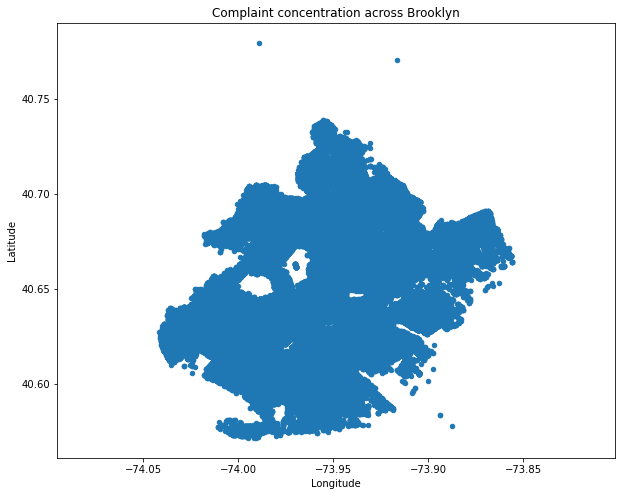

In [99]:
#draw scatter plot for concentration across Brooklyn
Brook_Data[['Longitude','Latitude']].plot(kind='scatter',
            x='Longitude',y='Latitude',figsize=(10,8),title='Complaint concentration across Brooklyn').axis('equal')

(-74.05061403048781, -73.8464793432815, 40.561126853754885, 40.78979838623255)

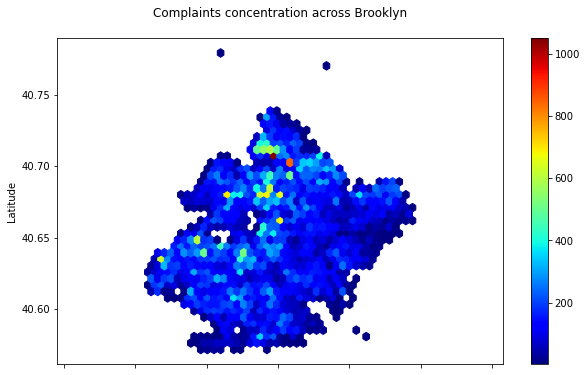

In [119]:
#draw hexbin plot for concentration across Brooklyn
Brook_Data.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across Brooklyn\n', figsize=(10,6)).axis('equal')

In [19]:
#select requred columns
select_data_311=pd.DataFrame()
select_data_311['City']=raw_data_311['City']
select_data_311['Complaint Type']= raw_data_311['Complaint Type']
select_data_311.head()


,City,Complaint Type
0,NEW YORK,Noise - Street/Sidewalk
1,ASTORIA,Blocked Driveway
2,BRONX,Blocked Driveway
3,BRONX,Illegal Parking
4,ELMHURST,Illegal Parking


In [20]:
#sort values by City
select_data_311=select_data_311.sort_values(by=['City'])
select_data_311.head(20)

,City,Complaint Type
22508,ARVERNE,Derelict Vehicle
347013,ARVERNE,Animal Abuse
190560,ARVERNE,Noise - Street/Sidewalk
218629,ARVERNE,Animal Abuse
190711,ARVERNE,Blocked Driveway
104711,ARVERNE,Noise - House of Worship
199237,ARVERNE,Illegal Parking
154616,ARVERNE,Blocked Driveway
209789,ARVERNE,Noise - Street/Sidewalk
86898,ARVERNE,Animal Abuse


In [21]:
#check for null values
select_data_311.isna().sum()

City              2997
Complaint Type       0
dtype: int64

In [22]:
#percentage of null values out of dataset shape
percent_select_data_311=(select_data_311['City'].isna().sum(axis=0)/select_data_311.shape[0])*100
percent_select_data_311

0.8220914093230707

In [23]:
#drop null values 
final_select_data_311=select_data_311.dropna(axis=0)
final_select_data_311.shape

(361561, 2)

In [24]:
#chek for null values
final_select_data_311.isna().sum()

City              0
Complaint Type    0
dtype: int64

In [25]:
np.unique(final_select_data_311.City)

array(['ARVERNE', 'ASTORIA', 'Astoria', 'BAYSIDE', 'BELLEROSE',
       'BREEZY POINT', 'BRONX', 'BROOKLYN', 'CAMBRIA HEIGHTS',
       'CENTRAL PARK', 'COLLEGE POINT', 'CORONA', 'EAST ELMHURST',
       'ELMHURST', 'East Elmhurst', 'FAR ROCKAWAY', 'FLORAL PARK',
       'FLUSHING', 'FOREST HILLS', 'FRESH MEADOWS', 'GLEN OAKS', 'HOLLIS',
       'HOWARD BEACH', 'Howard Beach', 'JACKSON HEIGHTS', 'JAMAICA',
       'KEW GARDENS', 'LITTLE NECK', 'LONG ISLAND CITY',
       'Long Island City', 'MASPETH', 'MIDDLE VILLAGE', 'NEW HYDE PARK',
       'NEW YORK', 'OAKLAND GARDENS', 'OZONE PARK', 'QUEENS',
       'QUEENS VILLAGE', 'REGO PARK', 'RICHMOND HILL', 'RIDGEWOOD',
       'ROCKAWAY PARK', 'ROSEDALE', 'SAINT ALBANS', 'SOUTH OZONE PARK',
       'SOUTH RICHMOND HILL', 'SPRINGFIELD GARDENS', 'STATEN ISLAND',
       'SUNNYSIDE', 'WHITESTONE', 'WOODHAVEN', 'WOODSIDE', 'Woodside'],
      dtype=object)

In [26]:
final_select_data_311= final_select_data_311.rename(columns={'Complaint Type':'ComplaintTypes'})
final_select_data_311.columns

Index(['City', 'ComplaintTypes'], dtype='object')

In [27]:
np.unique(final_select_data_311.ComplaintTypes)

array(['Animal Abuse', 'Animal in a Park', 'Bike/Roller/Skate Chronic',
       'Blocked Driveway', 'Derelict Vehicle', 'Disorderly Youth',
       'Drinking', 'Graffiti', 'Homeless Encampment', 'Illegal Fireworks',
       'Illegal Parking', 'Noise - Commercial',
       'Noise - House of Worship', 'Noise - Park',
       'Noise - Street/Sidewalk', 'Noise - Vehicle', 'Panhandling',
       'Posting Advertisement', 'Squeegee', 'Traffic',
       'Urinating in Public', 'Vending'], dtype=object)

In [28]:
top_10_complaints = pd.DataFrame(final_select_data_311['ComplaintTypes'].value_counts().head(10))
top_10_complaints 

,ComplaintTypes
Blocked Driveway,100548
Illegal Parking,91412
Noise - Street/Sidewalk,51054
Noise - Commercial,43687
Derelict Vehicle,21460
Noise - Vehicle,19294
Animal Abuse,10529
Traffic,5195
Homeless Encampment,4878
Vending,4185


In [29]:
final_select_data_311['City'].value_counts()

BROOKLYN               118862
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
WOODHAVEN                3103
LONG ISLAND CITY         3028
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2335
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2106
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT ALBA

In [30]:
import seaborn as sns

In [31]:
////////////---------------------



SyntaxError: invalid syntax (3458205125.py, line 1)

In [ ]:
#top 10 types of complaint
(final_select_data_311["ComplaintTypes"].value_counts()).head(10).plot(kind='bar',
        figsize=(10,10),title="Top 10 types of Complaints")

In [32]:
#display the types of complaint in each city in separate dataset
City_wise_compl_type= pd.crosstab(index=final_select_data_311["City"], columns=final_select_data_311["ComplaintTypes"])
City_wise_compl_type

ComplaintTypes,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,46,0,0,50,32,2,1,1,4,0,...,14,2,29,10,1,0,0,1,1,1
ASTORIA,170,0,16,3436,426,5,43,4,32,4,...,21,64,409,236,2,3,0,60,10,57
Astoria,0,0,0,159,14,0,0,0,0,0,...,0,0,145,0,0,0,0,0,0,0
BAYSIDE,53,0,0,514,231,2,1,3,2,0,...,3,4,17,24,0,0,0,9,0,2
BELLEROSE,15,0,1,138,120,2,1,0,1,1,...,1,1,13,11,1,1,0,9,1,0
BREEZY POINT,2,0,0,3,3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,1971,0,22,17063,2403,66,206,15,275,24,...,90,548,9146,3556,20,18,0,427,54,433
BROOKLYN,3191,0,124,36447,6259,79,291,60,948,61,...,389,1575,13984,5966,49,58,0,1258,155,575
CAMBRIA HEIGHTS,15,0,0,177,148,0,0,0,6,1,...,2,0,29,100,0,0,0,7,0,0


Text(0.5, 1.0, 'City wise complaint types ')

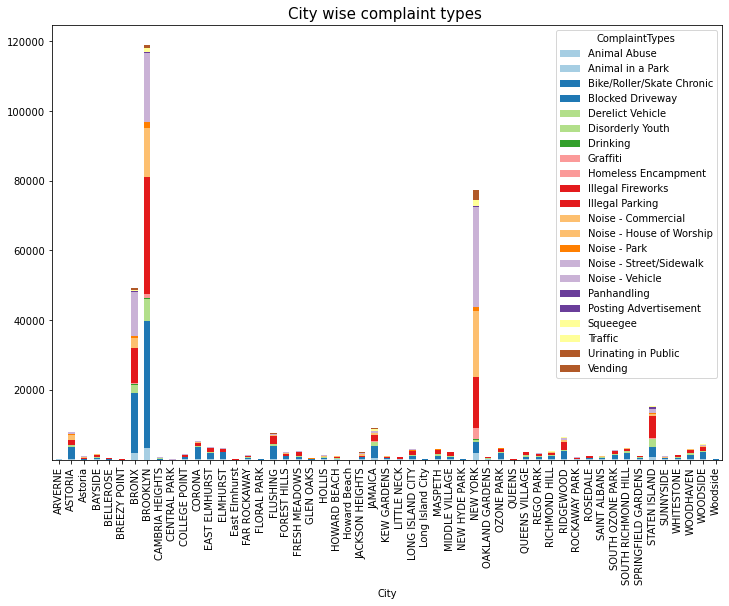

In [33]:
#Visualize the types of complaint in each city in separate dataset by bar chart
City_wise_compl_type.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
plt.title("City wise complaint types ", fontsize=15)

<AxesSubplot:title={'center':'Count vs complaint types '}, xlabel='count', ylabel='ComplaintTypes'>

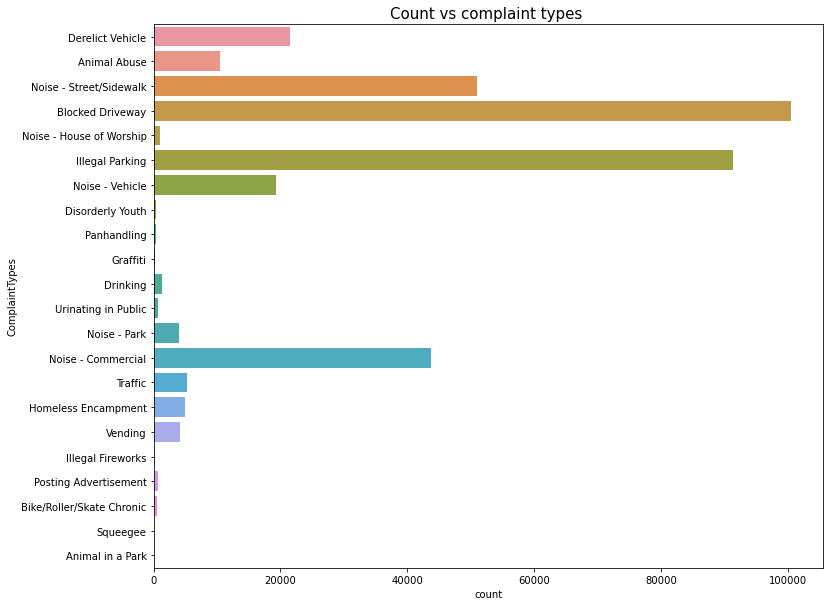

In [34]:
plt.figure(figsize=(12,10))
plt.title("Count vs complaint types ", fontsize=15)
sns.countplot(y='ComplaintTypes', data=final_select_data_311)

In [35]:
#brooklyn data 
final_select_data_311

,City,ComplaintTypes
22508,ARVERNE,Derelict Vehicle
347013,ARVERNE,Animal Abuse
190560,ARVERNE,Noise - Street/Sidewalk
218629,ARVERNE,Animal Abuse
190711,ARVERNE,Blocked Driveway
...,...,...
291762,Woodside,Illegal Parking
205870,Woodside,Illegal Parking
336022,Woodside,Illegal Parking
266087,Woodside,Noise - Street/Sidewalk


In [36]:
#complaint across the brooklyn 
Brook_complaint= final_select_data_311.loc[final_select_data_311['City']=='BROOKLYN']
print(Brook_complaint)

            City           ComplaintTypes
150616  BROOKLYN      Homeless Encampment
140996  BROOKLYN  Noise - Street/Sidewalk
145370  BROOKLYN         Blocked Driveway
152287  BROOKLYN         Blocked Driveway
136428  BROOKLYN  Noise - Street/Sidewalk
...          ...                      ...
312991  BROOKLYN          Illegal Parking
116444  BROOKLYN  Noise - Street/Sidewalk
312671  BROOKLYN  Noise - Street/Sidewalk
87201   BROOKLYN          Illegal Parking
325404  BROOKLYN       Noise - Commercial

[118862 rows x 2 columns]


<AxesSubplot:title={'center':'complaint concentration across Brooklyn '}, xlabel='count', ylabel='ComplaintTypes'>

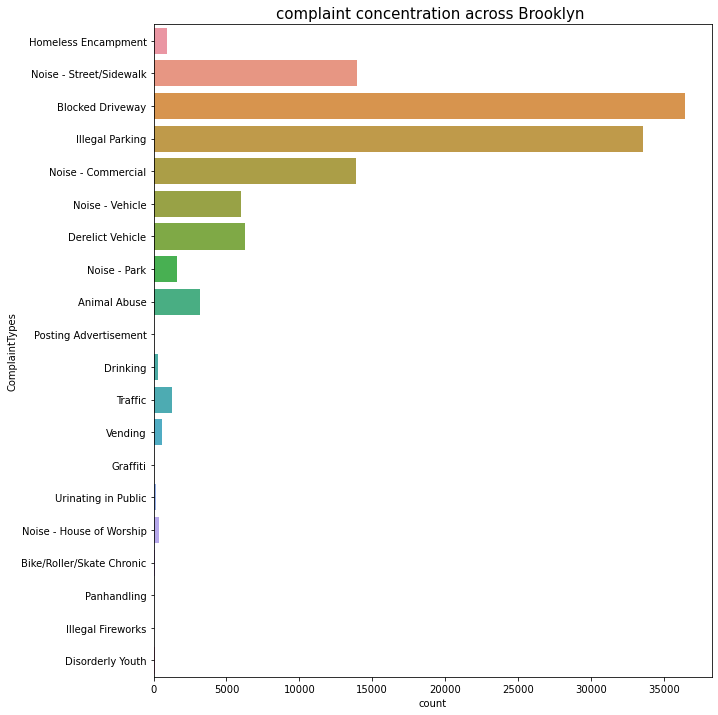

In [37]:
plt.figure(figsize=(10,12))
plt.title("complaint concentration across Brooklyn ", fontsize=15)
sns.countplot(y='ComplaintTypes', data=Brook_complaint)

In [38]:
df22=pd.DataFrame(np.unique(final_select_data_311.ComplaintTypes))
df22

,0
0,Animal Abuse
1,Animal in a Park
2,Bike/Roller/Skate Chronic
3,Blocked Driveway
4,Derelict Vehicle
5,Disorderly Youth
6,Drinking
7,Graffiti
8,Homeless Encampment
9,Illegal Fireworks


In [39]:
count=final_select_data_311['ComplaintTypes'].value_counts()
count

Blocked Driveway             100548
Illegal Parking               91412
Noise - Street/Sidewalk       51054
Noise - Commercial            43687
Derelict Vehicle              21460
Noise - Vehicle               19294
Animal Abuse                  10529
Traffic                        5195
Homeless Encampment            4878
Vending                        4185
Noise - Park                   4083
Drinking                       1401
Noise - House of Worship       1068
Posting Advertisement           680
Urinating in Public             641
Bike/Roller/Skate Chronic       473
Panhandling                     324
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Squeegee                          4
Animal in a Park                  1
Name: ComplaintTypes, dtype: int64

In [40]:
#average response time across various type of complaints
df=pd.read_csv('pythonfiles jupyter/python save files/311_Service_Requests_from_2010_to_Present.csv',header=0,
   sep=',', parse_dates=['Created Date', 'Closed Date', 'Resolution Action Updated Date'],index_col='Unique Key')
df.head()

C:\Users\Sachin R B\AppData\Local\Temp\ipykernel_7816\934585766.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('pythonfiles jupyter/python save files/311_Service_Requests_from_2010_to_Present.csv',header=0,


,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,
32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [129]:
def prepareData(df):
    df['Resolution_Time'] = (df['Closed Date'] - df['Created Date']).dt.days
    df_clean=df[df['Resolution_Time'].notnull()]
    df_perfect = df_clean[df_clean['Closed Date'] >= df_clean['Created Date']]
    df_perfect['Day of Week'] = df_perfect['Created Date'].dt.dayofweek
    df_perfect['Day of Month'] = df_perfect['Created Date'].dt.day
    df_perfect['Month'] = df_perfect['Created Date'].dt.month
    df_perfect['Year'] = df_perfect['Created Date'].dt.year
    df_perfect=df_perfect[df_perfect.Borough!='Unspecified']
    return df_perfect

In [131]:
df_perfect= prepareData(df)
df_perfect.shape

(361542, 57)

In [6]:
df_Brooklyn = df_perfect[df_perfect['Borough']=='BROOKLYN']

NameError: name 'df_perfect' is not defined

In [135]:
df_Brooklyn.shape

(118851, 57)

In [140]:
df_Brooklyn.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Resolution_Time,Day of Week,Day of Month,Month,Year
Unique Key,,,,,,,,,,,,,,,,,,,,,
32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,21 STREET,...,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",0.0,3,31,12,2015
32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,66 STREET,...,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)",0.0,3,31,12,2015
32305074,2015-12-31 23:47:58,2016-01-01 08:18:47,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,COX PLACE,...,NaN,NaN,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)",0.0,3,31,12,2015
32310273,2015-12-31 23:44:52,2016-01-01 00:36:10,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,DEGRAW STREET,...,NaN,NaN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)",0.0,3,31,12,2015
32306617,2015-12-31 23:40:59,2016-01-01 02:37:28,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,FLATBUSH AVENUE,...,NaN,NaN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)",0.0,3,31,12,2015


<AxesSubplot:title={'center':'Avg Response Time of Complaints'}, xlabel='Complaint Type', ylabel='Average Response Time'>

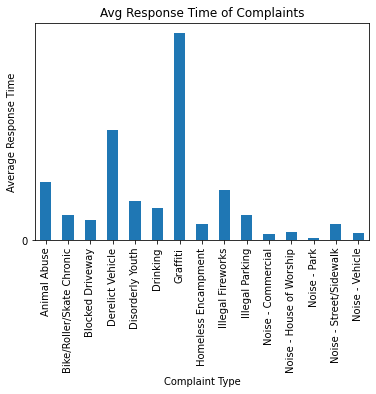

In [148]:
import matplotlib.ticker as ticker
var = df_Brooklyn.groupby('Complaint Type').Resolution_Time.mean()
frequent = df_Brooklyn['Complaint Type'].value_counts().head()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Complaint_Type')
ax1.set_ylabel('Average Response Time')
ax1.set_title("Avg Response Time of Complaints")
tick_spacing = 2
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
var.head(15).plot(kind='bar')